# 马氏链模型



## 马氏链简介






在考察随机因素影响的动态系统时，常常碰到这样的情况，**系统在每个时期所处的状态是随机的，从这个时期到下个时期的状态按照一定的概率进行转移，并且下个时期的状态只取决于这个时期的状态和转移概率，与以前各时期的状态无关**。这种性质称为无后效性或马尔可夫性。通俗的说就是将来仅仅与当下有关而与历史无关。具有马氏性的，时间、状态为离散的随机转移过程通常用马氏链(Markov Chain)模型描述。


```{figure} ../_static/lecture_specific/markov-chain/markov.jpg
---
height: 400px
name: markov
---

```

马尔可夫链由俄国数学家安德雷·马尔可夫首次提出。马氏链模型在经济、社会、生态、遗传等许多领域中有着广泛的应用。值得提出的是，虽然它是解决随机转移过程的工具，但是一些确定性系统的状态转移问题也能用马氏链模型处理。

## 随机过程的定义

一个随机试验的结果有多种可能性，在数学上用一个随机变量（或随机向量）来描述。在许多情况下，人们不仅需要对随机现象进行一次观测，而且要进行多次，甚至接连不断地观测它的变化过程。这就要研究无限多个，即一族随机变量。随机过程理论研究的就是随机现象变化过程的概率规律性。

**定义 1:** 设$\left\{\xi_{t}, t \in T\right\}$是一族随机变量，$T$ 是一个实数集合，若对任意实数 $t \in T, \xi_{t}$是一个随机变量，则称$\left\{\xi_{t}, t \in T\right\}$ 为随机过程。

$T$ 称为参数集合，参数$t$可以看作时间。$\xi_{t}$ 的每一个可能取值称为随机过程的一个状态。其全体可能取值所构成的集合称为状态空间，记作$E$。当参数集合$T$为非负整数集时，随机过程又称随机序列。


本章要介绍的**马氏链就是一类特殊的随机序列**。







## 马尔可夫链的定义



现实世界中有很多这样的现象：某一系统在已知现在情况的条件下，系统未来时刻的情况只与现在有关，而与过去的历史无直接关系。描述这类随机现象的数学模型称为马氏模型。


::::{admonition} 定义
设$\left\{\xi_{n}, n=1,2, \cdots\right\}$是一个随机序列，状态空间$E$ 为有限或可列集，对于任意的正整数$n$ ，若$i, j, i_{k} \in E(k=1, \cdots, n-1)$，有

$$
P\left\{\xi_{n+1}=j | \xi_{n}=i, \xi_{n-1}=i_{n-1}, \cdots, \xi_{1}=i_{1}\right\}=P\left\{\xi_{n+1}=j | \xi_{n}=i\right\}
$$(markov_definition)




则称$\left\{\xi_{n}, n=1,2, \cdots\right\}$ 为一个马尔可夫链（简称马氏链），{eq}`markov_definition`式称为马氏性。

:::{tip}
这里的$|$表示条件概率，例如$P(A|B)$表示$B$发生的条件下$A$发生的概率。
:::

::::



```{admonition} 马氏链案例
在$m$个商店联营出租照相机的业务中（顾客从其中一个商店租出，可以到$m$个商店中的任意一个归还），规定一天为一个时间单位，“$\xi_{t}=j$ ”表示“第$t$ 天开始营业时照相机在第$j$个商店”，$j = 1,2,\cdots,m$ 。则$\{ \xi_n = 1,2,\cdots\}$是一个随机序列，其状态空间 $E = \{1,2,\cdots,m\}$。

我们从生活经验知道，照相机明天会位于哪个商店，是完全由今天的状态决定的，历史上它曾经去过哪个商店已经不重要了。也就是说，相机的位置没有记忆性，这是一个典型的马氏链Markov Chain。
```


## 转移概率矩阵

我们先来看一个例子，用来引入转移概率矩阵的定义


```{admonition} 转移概率矩阵案例
某计算机机房的一台计算机经常出故障，研究者每隔 15 分钟观察一次计算机的运行状态，收集了 24 小时的数据（共作 97 次观察）。用 1 表示正常状态，用 0 表示不正常状态，所得的数据序列如下：


`1110010011111110011110111111001111111110001101101111011011010111101110111101111110011011111100111`

```
设$X_{n}(n=1, \cdots, 97)$为第$n$ 个时段的计算机状态，可以认为它是一个马氏链，状态空间 $E = \{0,1\}$，

求得 96 次状态转移的情况是：

0 → 0，8 次； 0 →1，18 次；

1→ 0 ，18 次； 1→1，52 次，

因此，一步转移概率可用频率近似地表示为

$$
p_{00}=P\left\{X_{n+1}=0 | X_{n}=0\right\} \approx \dfrac{8}{8+18}=\dfrac{4}{13}
$$

$$
p_{01}=P\left\{X_{n+1}=1 | X_{n}=0\right\} \approx \dfrac{18}{8+18}=\dfrac{9}{13}
$$

$$
p_{10}=P\left\{X_{n+1}=0 | X_{n}=1\right\} \approx \dfrac{18}{18+52}=\dfrac{9}{35}
$$

$$
p_{11}=P\left\{X_{n+1}=1 | X_{n}=1\right\} \approx \dfrac{52}{18+52}=\dfrac{26}{35}
$$


对于一个马尔可夫链$\left\{\xi_{n}, n=1,2, \cdots\right\}$ ，称$P =[p_ {ij}]$ 为马尔可夫链的一步转移矩阵。它们具有下列两个基本性质：

（i）对一切$i, j \in E, \quad 0 \leq p_{i j}(m) \leq 1$； 

（ii）对一切$i \in E, \sum_{j \in E} p_{i j}(m)=1$；     


```{admonition} 思考
你能解释为什么以上两个性质成立吗?
```


当实际问题可以用马尔可夫链来描述时，首先要确定它的状态空间及参数集合，然后确定它的一步转移概率。关于这一概率的确定，可以由问题的内在规律得到，也可以由过去经验给出，还可以根据观测数据来估计。



```{admonition} 转移概率矩阵求解案例

设一随机系统状态空间 $E = \{1,2,3,4\}$，记录观测系统所处状态如下：

`4 3 2 1 4 3 1 1 2 3 2 1 2 3 4 4 3 3 1 1 1 3 3 2 1 2 2 2 4 4 2 3 2 3 1 1 2 4 3 1 `

若该系统可用马氏模型描述，估计转移概率$p_{ij}$ 



**解：** 首先将不同类型的转移数nij 统计出来分类记入下表

$i \rightarrow j$转移数$n_{ij}$

$$
\begin{array}{|c|cccc|c|}\hline & {1} & {2} & {3} & {4} & {\text { 行和 } n_{i}} \\ \hline 1 & {4} & {4} & {1} & {1} & {10} \\ {2} & {3} & {2} & {4} & {2} & {11} \\ {3} & {4} & {4} & {2} & {1} & {11} \\ {4} & {0} & {1} & {4} & {2} & {7} \\ \hline\end{array}
$$

各类转移总和$\displaystyle \sum_{i} \sum_{j} n_{i j}$等于观测数据中马氏链处于各种状态次数总和减 1，而行和$n_i$ 是系统从状态$i$ 转移到其它状态的次数,$n_{ij}$是由状态$i$ 到状态 $j $的转移次数,，则 $p_{ij}$ 的估计值$p_{i j}=\dfrac{n_{i j}}{n_{i}}$。计算得

$$
\hat{P}=\left[\begin{array}{cccc}{2 / 5} & {2 / 5} & {1 / 10} & {1 / 10} \\ {3 / 11} & {2 / 11} & {4 / 11} & {2 / 11} \\ {4 / 11} & {4 / 11} & {2 / 11} & {1 / 11} \\ {0} & {1 / 7} & {4 / 7} & {2 / 7}\end{array}\right]
$$
```

## 柯尔莫哥洛夫定理

设$P$是一个马氏链转移矩阵（ $P$ 的行向量是概率向量）， $P^{(0)}$ 是初始分布行向量，则第$n$ 步的概率分布为

$$
P^{(n)}=P^{(0)} P^{n}
$$

```{admonition} 柯尔莫哥洛夫定理案例

若顾客的购买是无记忆的，即已知现在顾客购买情况，未来顾客的购买情况不受过去购买历史的影响，而只与现在购买情况有关。现在市场上供应$A、B、C$三个不同厂家生产的 50 克袋状味精，用“$\xi_n = 1$”、“$\xi_n = 2$ ”、“$\xi_n = 3$”分别表示“顾客第$n$ 次购买$A、B、C$厂的味精”。显然$\left\{\xi_{n}, n=1,2, \cdots\right\}$是一个马氏链。若已知第一次顾客购买三个厂味精的概率依次为 0.2，0.4，0.4。又知道一般顾客购买的倾向由表 2给出。求顾客第四次购买各家味精的概率。


![Image Name](https://cdn.kesci.com/upload/image/q2y45nlv3n.png?imageView2/0/w/960/h/960)




**解:** 第一次购买的概率分布为
$P^{(1)}=\left[\begin{array}{lll}{0.2} & {0.4} & {0.4}\end{array}\right]$

转移矩阵$P=\left[\begin{array}{lll}{0.8} & {0.1} & {0.1} \\ {0.5} & {0.1} & {0.4} \\ {0.5} & {0.3} & {0.2}\end{array}\right]$

则顾客第四次购买各家味精的概率为
$P^{(4)}=P^{(1)} P^{3}=\left[\begin{array}{ccc}{0.7004} & {0.136} & {0.1636}\end{array}\right]$。

```

In [1]:
import numpy as np
p1 = np.array([0.2,0.4,0.4])
P = np.array([[0.8,0.1,0.1],[0.5,0.1,0.4],[0.5,0.3,0.2]])
for i in range(10):
    p2 = np.dot(p1,P)
    p1 = p2
    print(p1)

[0.56 0.18 0.26]
[0.668 0.152 0.18 ]
[0.7004 0.136  0.1636]
[0.71012 0.13272 0.15716]
[0.713036 0.131432 0.155532]
[0.7139108 0.1311064 0.1549828]
[0.71417324 0.13099656 0.1548302 ]
[0.71425197 0.13096604 0.15478199]
[0.71427559 0.1309564  0.15476801]
[0.71428268 0.1309536  0.15476372]


## 转移概率的渐近性质—极限概率分布


现在我们考虑，随$n $的增大， $P^n$ 是否会趋于某一固定向量？先考虑一个简单例子：
转移矩阵$P=\left[\begin{array}{ll}{0.5} & {0.5} \\ {0.7} & {0.3}\end{array}\right]$ ,当$n \rightarrow+\infty$
时


$$
P^{n} \rightarrow\left[\begin{array}{cc}{\dfrac{7}{12}} & {\dfrac{5}{12}} \\ {\dfrac{7}{12}} & {\dfrac{5}{12}}\end{array}\right]
$$


又若取 

$$
u=\left[\begin{array}{ll}{\dfrac{7}{12}} & {\dfrac{5}{12}}\end{array}\right]
$$

则$u P=u, u^{T}$为矩阵 $P^T$ 的对应于特征值$λ = 1$的特征（概率）向量，$u$ 也称为 $P$ 的不动点向量。至于哪些转移矩阵具有不动点向量，需要借助矩阵理论中正则矩阵的概念进行证明。（此处不要求掌握） ，我们只需要通过循环计算，观察计算结果是否稳定即可。

```{admonition} 极限概率分布

根据例 6 中给出的一般顾客购买三种味精倾向的转移矩阵，预测经过长期的多次购买之后，顾客的购买倾向如何？


**解** :  可以根据这个马氏链的转移矩阵，求出其极限概率分布。为此，解下列方程组：

$$
\left\{\begin{array}{l}{p_{1}=0.8 p_{1}+0.5 p_{2}+0.5 p_{3}} \\ {p_{2}=0.1 p_{1}+0.1 p_{2}+0.3 p_{3}} \\ {p_{3}=0.1 p_{1}+0.4 p_{2}+0.2 p_{3}} \end{array}\right.
$$

求得 $p_1=\dfrac{5}{7}$,$p_2=\dfrac{11}{84}$,$p_3=\dfrac{13}{84}$
这说明，无论第一次顾客购买的情况如何，经过长期多次购买以后， $A$ 厂产的味精占有市场的$\dfrac{5}{7}$,$B$,$C$ 两厂产品分别占有市场的$\dfrac{11}{84}$,$\dfrac{13}{84}$
```

## 吸收链

马氏链还有一种重要类型—吸收链。

若马氏链的转移矩阵为

$$
P=\left[\begin{array}{cccc}{0.3} & {0.3} & {0} & {0.4} \\ {0.2} & {0.3} & {0.2} & {0.3} \\ {0} & {0.3} & {0.3} & {0.4} \\ {0} & {0} & {0} & {1}\end{array}\right]
$$

$P$ 的最后一行表示的是，当转移到状态 4 时，将停留在状态 4，状态 4 称为吸收状态。如果马氏链至少含有一个吸收状态，并且从每一个非吸收状态出发，都可以到达某个吸收状态，那么这个马氏链被称为吸收链。

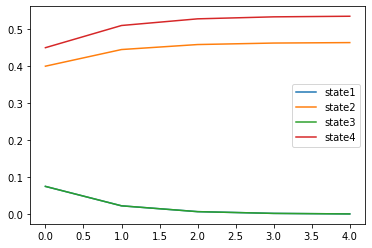

In [2]:
import matplotlib.pyplot as plt

P_0 = [0.25,0.25,0.25,0.25]

P = [[0.3,0.3,0,0.4],
     [0,1,0,0],
     [0,0.3,0.3,0.4],
     [0,0,0,1]]

state1 = []
state2 = []
state3 = []
state4 = []

for i in range(5):
    P_0 = np.dot(P_0,P)
    # P_0  = P_0/sum(P_0)
    state1.append(P_0[0])
    state2.append(P_0[1])
    state3.append(P_0[2])
    state4.append(P_0[3])

plt.plot(state1,label = 'state1')
plt.plot(state2,label = 'state2')
plt.plot(state3,label = 'state3')
plt.plot(state4,label = 'state4')
plt.legend()

## 马氏链案例代码求解 


如果李梅心情不好，她会跑步，或者大吃特吃冰淇淋，要么打个盹儿来调整。

根据以往数据，如果她睡了一觉调整心情，第二天她有 60% 的可能去跑步，20% 的可能继续待在床上，还有 20% 的可能吃一大份冰淇淋。

如果她跑步散心，第二天她有 60% 的可能接着跑步，30% 的可能吃冰淇淋，只有 10% 的可能会去睡觉。

最后，如果她难过时纵情冰淇淋，第二天只有 10% 的可能性继续吃冰淇淋，有 70% 的可能性跑步，还有 20% 的可能性睡觉。

### 问题：从睡觉状态开始，2 天后李梅最后选择跑步的概率是多少？


我们一起算一下。要从睡觉状态转移到跑步状态，李梅有如下选择：第一天继续睡觉，第二天跑步$（0.2 \times0.6）$；第一天换成跑步，第二天继续跑步$（0.6\times0.6）$；第一天去吃冰淇淋，第二天换成跑步$（0.2 \times0.7）$。算下来概率是：$((0.2 \times 0.6) + (0.6 \times 0.6) + (0.2 \times 0.7)) = 0.62$。所以说，从睡觉状态开始，2天后李梅处于跑步状态的概率是 62%。


现在我们用 Python 来实现一下上面这个例子


### 先尝试随机生成李梅2天后的状态

In [3]:
#先 import 用到的库。
import numpy as np
import random as rm


# 状态空间
states = ["Sleep","Icecream","Run"]

# 可能的事件序列
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# 概率矩阵（转移矩阵）
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

#要保证概率之和（行之和）是 1
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay! ")

#我们要用 numpy.random.choice 从可能的转移集合选出随机样本。
# 实现了可以预测状态的马尔可夫模型的函数。
def activity_forecast(days):
    # 选择初始状态
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # 应该记录选择的状态序列。这里现在只有初始状态。
    activityList = [activityToday]
    i = 0
    # 计算 activityList 的概率
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# 预测 2 天后的可能状态
activity_forecast(2)

All is gonna be okay! 
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3


从睡觉状态开始，迭代上几百次，就能得到终止于特定状态的预期概率。


改写了 activity_forecast 函数，加入循环

In [4]:
#先 import 用到的库。
import numpy as np
import random as rm


# 状态空间
states = ["Sleep","Icecream","Run"]

# 可能的事件序列
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# 概率矩阵（转移矩阵）
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

#要保证概率之和（行之和）是 1
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay! ")

#我们要用 numpy.random.choice 从可能的转移集合选出随机样本。
# 改写了了可以预测状态的马尔可夫模型的函数。
def activity_forecast(days):
    # 选择初始状态
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# 记录每次的 activityList
list_activity = []
count = 0

# `range` 从第一个参数开始数起，一直到第二个参数（不包含）
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# 查看记录到的所有 `activityList`    
#print(list_activity)

# 遍历列表，得到所有最终状态是跑步的 activityList
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# 计算从睡觉状态开始到跑步状态结束的概率
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

All is gonna be okay! 


The probability of starting at state:'Sleep' and ending at state:'Run'= 61.91%


基于大数定律，结果趋于62%



## 作业

```{admonition} 作业1

在英国，工党成员的第二代加入工党的概率为0.5，加入保守党的概率为0.4，加入自由党的概率为0.1。而保守党成员的第二代加入工党的概率为0.7，加入保守党的概率为0.2，加入自由党的概率为0.1。而自由党成员的第二代加入工党的概率为0.2，加入保守党的概率为0.4，加入自由党的概率为0.4。
也就是说，其转移概率矩阵为：

|      	|   	|     	| 下一代党派 	|     	|
|------	|---	|-----	|------	|-----	|
|      	|   	| 工党   	| 保守党    	| 自由党   	|
|      	| 工党 	| 0.5 	| 0.4  	| 0.1 	|
| 上一代党派 	| 保守党	| 0.7 	| 0.2  	| 0.1 	|
|      	| 自由党 	| 0.2 	| 0.4  	| 0.4 	|


- 求自由党成员的第三代加入工党的概率是多少？
- 在经过较长的时间后，各党成员的后代加入各党派的概率分布是否具有稳定性？如果有，求出这个稳定概率分布，如果没有，请说明理由。

```

```{admonition} 作业2
社会学的某些调查结果指出：儿童受教育的水平依赖于他们父母受教育的水平。调查过程是将人们划分为三类：$E$ 类，这类人具有初中或初中以下的文化程度；$S$类，这类人具有高中文化程度；$C$ 类，这类人受过高等教育。当父或母（指文化程度较高者）是这三类人中某一类型时，其子女将属于这三种类型中的任一种的概率由下面给出

|      	|   	|     	| 孩子 	|     	|
|------	|---	|-----	|------	|-----	|
|      	|   	| $E$   	| $S$    	| $C$   	|
|      	| $E$ 	| 0.7 	| 0.2  	| 0.1 	|
| 父母 	| $S$ 	| 0.4 	| 0.4  	| 0.2 	|
|      	| $C$ 	| 0.1 	| 0.2  	| 0.7 	|
问：
- 属于$S$ 类的人们中，其第三代将接受高等教育的概率是多少？
- 假设不同的调查结果表明，如果父母之一受过高等教育，那么他们的子女总可以进入大学，修改上面的转移矩阵。
- 根据2的解，每一类型人的后代平均要经过多少代，最终都可以接受高等教育？
```